SIMPLE LINEAR REGRESSION ON MBA SALARY DATASET


D. sai satya vamsi krishna raju


20191COM0236

5COM-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("MBA Salary (3).csv")
df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


dependent variable:Salary


independent variable:percentage in grade 10

In [5]:
df.shape

(50, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [8]:
df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


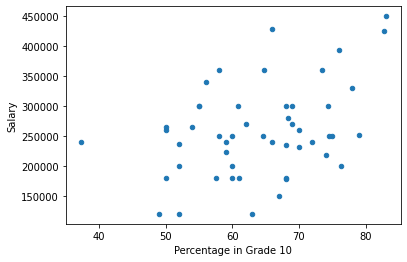

In [28]:
df.plot(kind='scatter',x='Percentage in Grade 10',y='Salary')
plt.show()

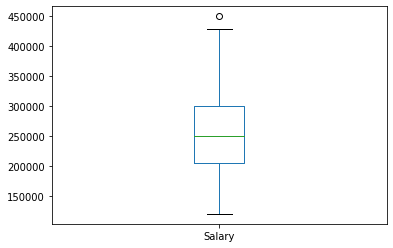

In [29]:
df.plot(kind='box',x='Percentage in Grade 10',y='Salary')
plt.show()

No outlier in our data set by seeing box plot


In [12]:
df.isnull().sum()

S. No.                    0
Percentage in Grade 10    0
Salary                    0
dtype: int64

No null values in our data set so, we can proceed  for model building

The OLS model estimates only the coefficient of X (Beta 1 or slope). To estimate Beta 0, a constant term of 1 needs to be added as a seperate column.

In [13]:
import statsmodels.api as sm
X=sm.add_constant(df['Percentage in Grade 10'])
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [15]:
Y=df['Salary']
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

spliting dataset into training and validation

In [16]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=100)

Fit the model

In [17]:
df_lm=sm.OLS(train_Y,train_X).fit()

estimated parameters for model

In [18]:
df_lm.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

model diagnostics-printing the coefficient of determination r square

In [19]:
df_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Sat, 30 Oct 2021   Prob (F-statistic):            0.00287
Time:                        10:54:10   Log-Likelihood:                -502.43
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.059e+04   7.19e+04      0.426      0.673   -1.15e+05    1.76e+05
Percentage in Grade 10  3560.5874   1116.926      3.188      0.003    1299.489    5821.686
==============================================================================
Omnibus:                        2.048   Durbin-Watson:                   2.611
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.724
Skew:                           0.369   Prob(JB):                        0.422
Kurtosis:                       2.300   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-10-30 10:54      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

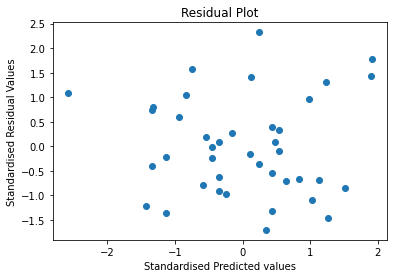

In [21]:
def get_std_values(vals):
  return(vals - vals.mean())/vals.std()
x_axis = get_std_values(df_lm.fittedvalues)
y_axis = get_std_values(df_lm.resid)
plt.scatter(x_axis, y_axis)
plt.xlabel("Standardised Predicted values")
plt.ylabel("Standardised Residual Values")
plt.title("Residual Plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


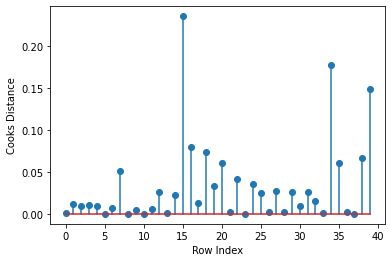

In [22]:
mba_influence = df_lm.get_influence()
(c,p) = mba_influence.cooks_distance
plt.stem(np.arange(len(train_X)), np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

There is no observation with Cooks's distance > 1. Hence none of them are influential.

making predictions o validation set and mesuring accuracy

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
pred_y = df_lm.predict(test_X)
print('R2 Score =',np.abs(r2_score(test_Y,pred_y)))
print('RMSE = ', np.sqrt(mean_squared_error(test_Y,pred_y)))

R2 Score = 0.156645849742304
RMSE =  73458.04348346895
